In [ ]:
from google.colab import files
uploaded = files.upload()
import zipfile
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import nltk
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

os.makedirs("datos_extraidos", exist_ok=True)

def extraer_zip(ruta_zip):
    with zipfile.ZipFile(ruta_zip, 'r') as zip_ref:
        zip_ref.extractall("datos_extraidos")

extraer_zip("Fake.csv.zip")
extraer_zip("True.csv.zip")


df_fake = pd.read_csv("datos_extraidos/Fake.csv")
df_true = pd.read_csv("datos_extraidos/True.csv")

df_fake["label"] = "fake"
df_true["label"] = "true"


df_total = pd.concat([df_fake, df_true], ignore_index=True)
df_total.head()


Saving True.csv.zip to True.csv (2).zip
Saving Fake.csv.zip to Fake.csv (2).zip


,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


<Figure size 250x150 with 0 Axes>

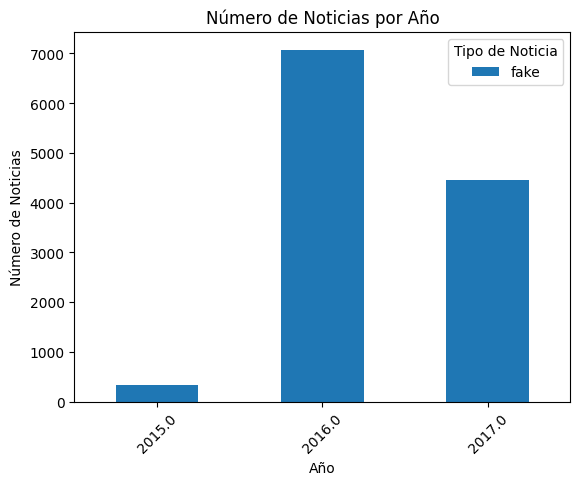

<Figure size 500x300 with 0 Axes>

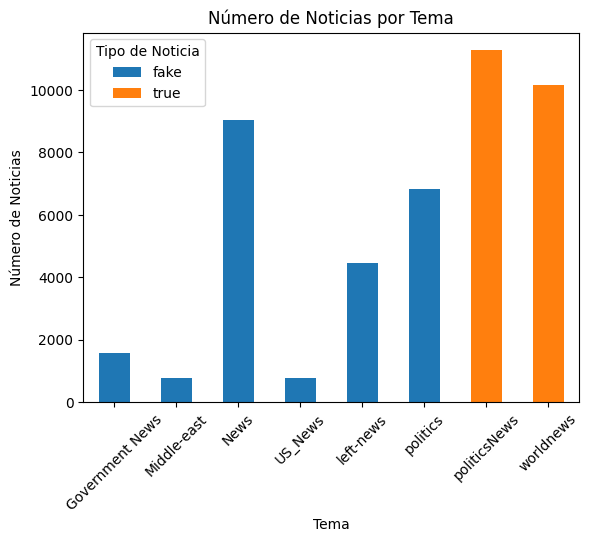

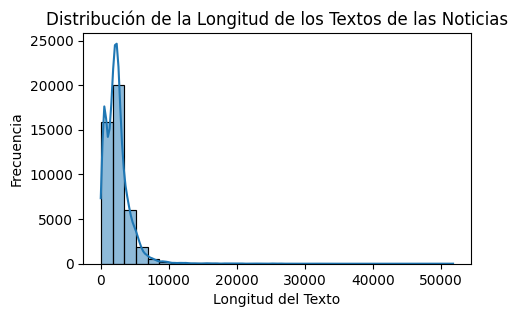

In [ ]:
#Base de datos de noticias reales y falsas.

df_total['date'] = pd.to_datetime(df_total['date'], errors='coerce')

df_total['year'] = df_total['date'].dt.year

noticias_por_año = df_total.groupby(['year', 'label']).size().unstack(fill_value=0)

plt.figure(figsize=(2.5, 1.5))
noticias_por_año.plot(kind='bar', stacked=True)
plt.title('Número de Noticias por Año')
plt.xlabel('Año')
plt.ylabel('Número de Noticias')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Noticia')
plt.show()

noticias_por_tema = df_total.groupby(['subject', 'label']).size().unstack(fill_value=0)

plt.figure(figsize=(5, 3))
noticias_por_tema.plot(kind='bar', stacked=True)
plt.title('Número de Noticias por Tema')
plt.xlabel('Tema')
plt.ylabel('Número de Noticias')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Noticia')
plt.show()

df_total['length'] = df_total['text'].apply(len)

plt.figure(figsize=(5, 3))
sns.histplot(df_total['length'], bins=30, kde=True)
plt.title('Distribución de la Longitud de los Textos de las Noticias')
plt.xlabel('Longitud del Texto')
plt.ylabel('Frecuencia')
plt.show()


title      0
text       0
subject    0
date       0
dtype: int64
title      0
text       0
subject    0
date       0
dtype: int64


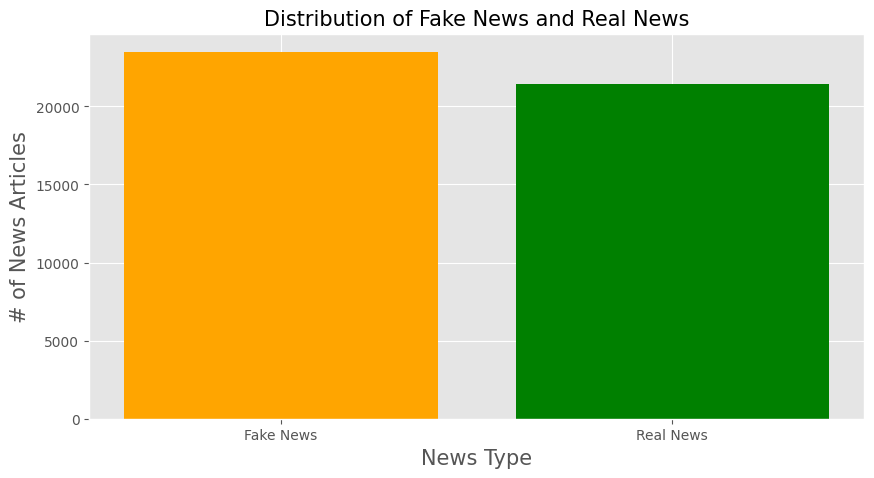

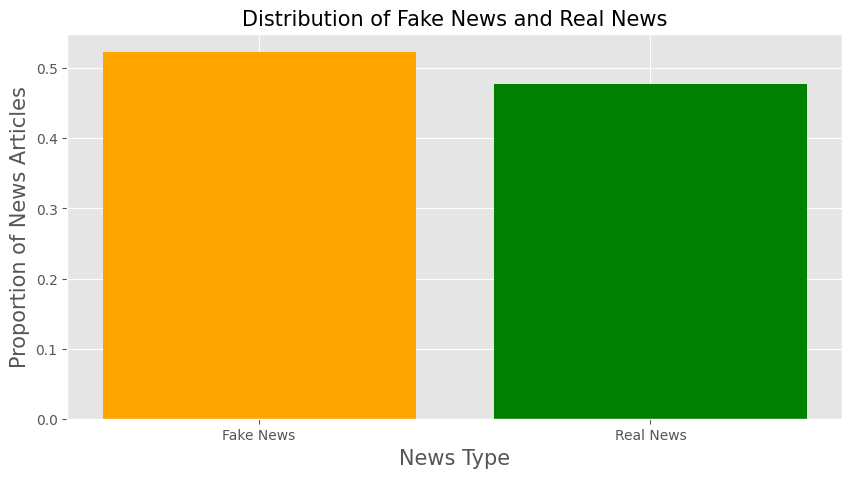

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_8 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_9 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1078/1078 ━━━━━━━━━━━━━━━━━━━━ 535s 488ms/step - accuracy: 0.8064 - loss: 0.4033 - val_accuracy: 0.9844 - val_loss: 0.0472
Epoch 2/10
1078/1078 ━━━━━━━━━━━━━━━━━━━━ 535s 497ms/step - accuracy: 0.9899 - loss: 0.0412 - val_accuracy: 0.9897 - val_loss: 0.0331
Epoch 3/10
1078/1078 ━━━━━━━━━━━━━━━━━━━━ 560s 495ms/step - accuracy: 0.9950 - loss: 0.0211 - val_accuracy: 0.9880 - val_loss: 0.0372
Epoch 4/10
1078/1078 ━━━━━━━━━━━━━━━━━━━━ 537s 498ms/step - accuracy: 0.9977 - loss: 0.0111 - val_accuracy: 0.9922 - val_loss: 0.0309
Epoch 5/10
1078/1078 ━━━━━━━━━━━━━━━━━━━━ 558s 495ms/step - accuracy: 0.9981 - loss: 0.0087 - val_accuracy: 0.9928 - val_loss: 0.0285
Epoch 6/10
1078/1078 ━━━━━━━━━━━━━━━━━━━━ 548s 508ms/step - accuracy: 0.9986 - loss: 0.0057 - val_accuracy: 0.9908 - val_loss: 0.0343
Epoch 7/10
1078/1078 ━━━━━━━━━━━━━━━━━━━━ 548s 496ms/step - accuracy: 0.9990 - loss: 0.0050 - val_accuracy: 0.9839 - val_loss: 0.0576


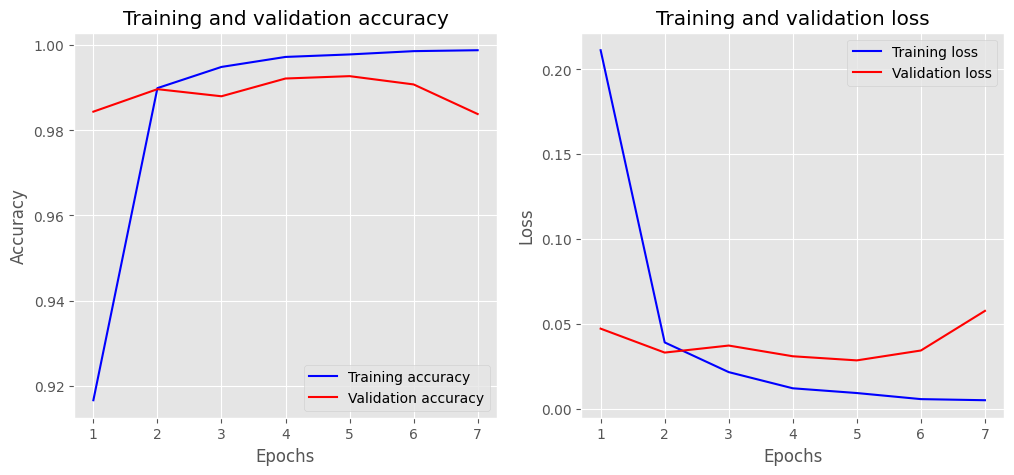

In [ ]:
import os
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
import tensorflow as tf

# Establecer el estilo de matplotlib
plt.style.use('ggplot')

# Crear un directorio para los datos
os.makedirs("data", exist_ok=True)

# Extraer archivos zip
with zipfile.ZipFile('Fake.csv.zip', 'r') as z:
    z.extractall('data')
with zipfile.ZipFile('True.csv.zip', 'r') as z:
    z.extractall('data')

# Cargar los datos
fake_df = pd.read_csv('data/Fake.csv')
real_df = pd.read_csv('data/True.csv')

# Verificar valores nulos
print(fake_df.isnull().sum())
print(real_df.isnull().sum())

# Eliminar columnas innecesarias
fake_df.drop(['date', 'subject'], axis=1, inplace=True)
real_df.drop(['date', 'subject'], axis=1, inplace=True)

# Asignar etiquetas de clase
fake_df['class'] = 0
real_df['class'] = 1

# Gráfico de distribución de noticias
plt.figure(figsize=(10, 5))
plt.bar('Fake News', len(fake_df), color='orange')
plt.bar('Real News', len(real_df), color='green')
plt.title('Distribution of Fake News and Real News', size=15)
plt.xlabel('News Type', size=15)
plt.ylabel('# of News Articles', size=15)
plt.show()

# Gráfico de proporción de noticias
total_len = len(fake_df) + len(real_df)
plt.figure(figsize=(10, 5))
plt.bar('Fake News', len(fake_df) / total_len, color='orange')
plt.bar('Real News', len(real_df) / total_len, color='green')
plt.title('Distribution of Fake News and Real News', size=15)
plt.xlabel('News Type', size=15)
plt.ylabel('Proportion of News Articles', size=15)
plt.show()

# Concatenar los DataFrames
news_df = pd.concat([fake_df, real_df], ignore_index=True, sort=False)

# Combinar el título y el texto
news_df['text'] = news_df['title'] + ' ' + news_df['text']
news_df.drop('title', axis=1, inplace=True)

# Definir características y objetivos
features = news_df['text']
targets = news_df['class']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.20, random_state=18)

# Función para normalizar el texto
def normalize(data):
    normalized = []
    for i in data:
        i = i.lower()
        i = re.sub('https?://\S+|www\.\S+', '', i)
        i = re.sub('\\W', ' ', i)
        i = re.sub('\n', '', i)
        i = re.sub(' +', ' ', i)
        i = re.sub('^ ', '', i)
        i = re.sub(' $', '', i)
        normalized.append(i)
    return normalized

# Normalizar los conjuntos de entrenamiento y prueba
X_train = normalize(X_train)
X_test = normalize(X_test)

# Tokenización
max_vocab = 10000
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

# Rellenar secuencias
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, padding='post', maxlen=256)
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, padding='post', maxlen=256)

# Definir el modelo
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_vocab, 128),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Cambiar a 'sigmoid' para la salida binaria
])

# Resumen del modelo
model.summary()

# Compilación del modelo
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),  # Cambiar a False
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

# Entrenamiento del modelo
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1, batch_size=30, shuffle=True, callbacks=[early_stop])

# Extraer la historia del entrenamiento
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(acc) + 1)

# Graficar la precisión
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Graficar la pérdida
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Usar LSTM y deep learning en bases de datos grandes es muy útil porque estas tecnologías pueden manejar datos secuenciales o series temporales, como texto o eventos que ocurren a lo largo del tiempo. LSTM, en particular, es capaz de aprender patrones a largo plazo en estos datos, lo que otros modelos no pueden hacer tan bien. Además, deep learning permite trabajar con grandes cantidades de datos sin necesidad de hacer mucho preprocesamiento, lo que lo hace más eficiente y preciso en tareas como predicciones y clasificación. Esto hace que sea una opción ideal cuando se tiene una base de datos extensa y compleja.